# Visualization of distributional shapes using the [beta-distribution](https://en.wikipedia.org/wiki/Beta_distribution)

/home/christina/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/christina/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/christina/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


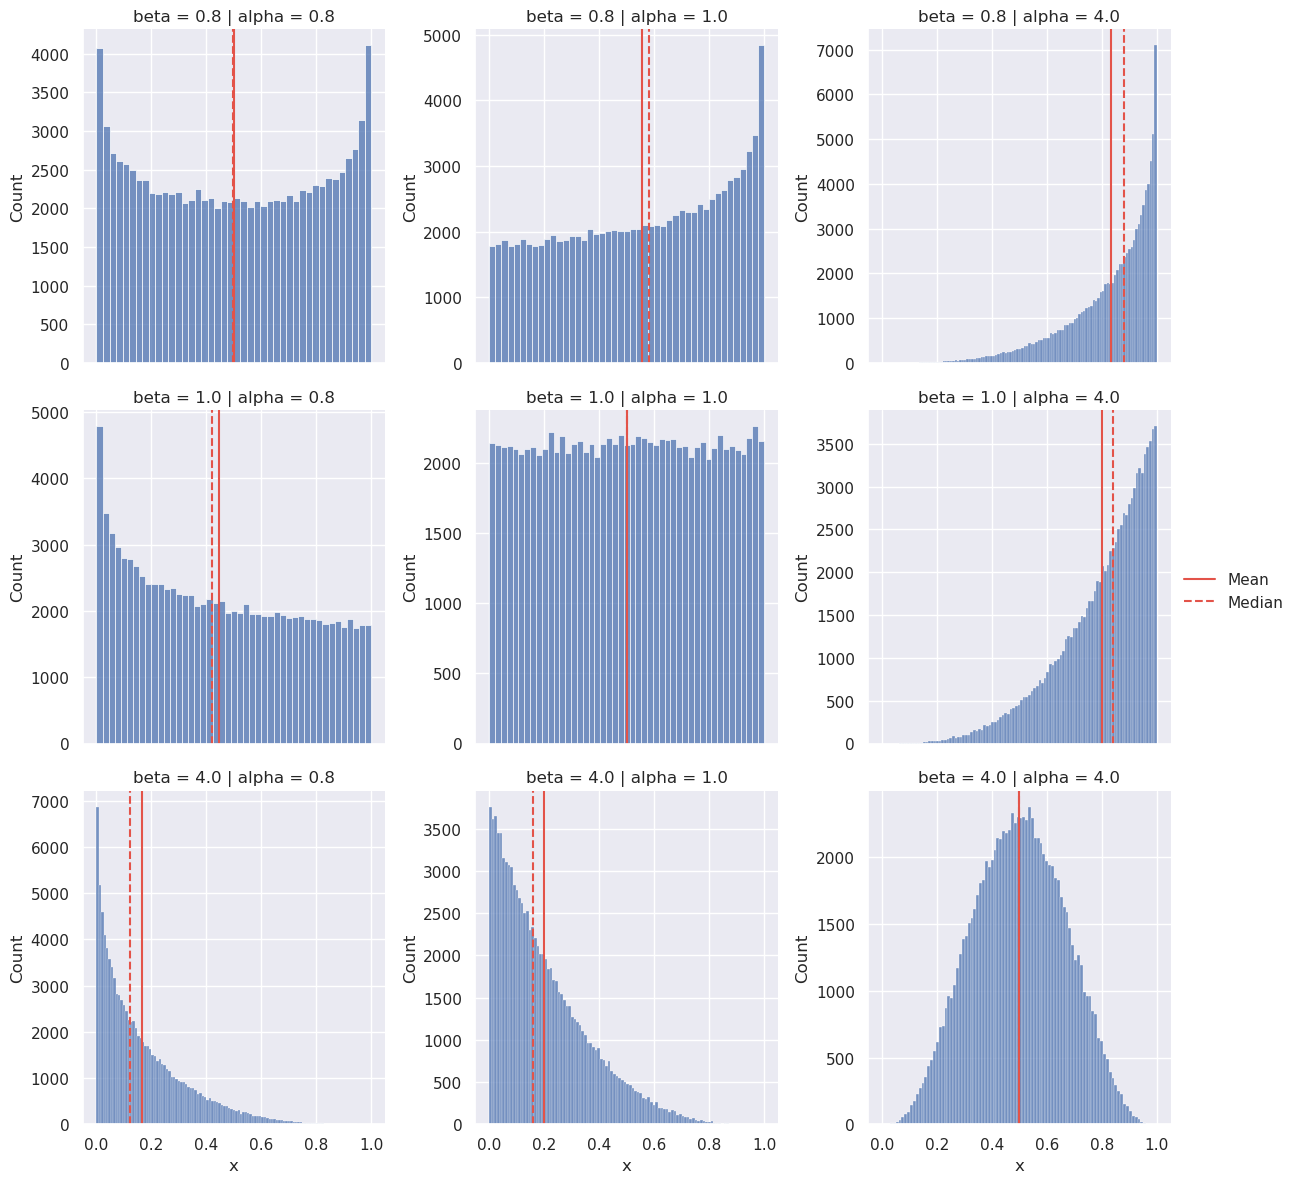

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

dat = pd.DataFrame()
vals = [0.8, 1, 4]
for alpha in vals:
    for beta in vals:
        x = {
            'x': np.random.beta(alpha, beta, size = 100000),
            'alpha': alpha,
            'beta': beta
        }
        x['mean'] = np.mean(x['x'])
        x['median'] = np.median(x['x'])
        dat = pd.concat([dat,pd.DataFrame(x)])

def vertical_line(x, **kwargs):
    plt.axvline(x[1], **kwargs)
 
g = sns.FacetGrid(dat, col="alpha", row="beta", sharey=False, height=4)
g = g.map(vertical_line, "mean", c='#e35349', label='Mean')
g = g.map(vertical_line, "median", c='#e35349', label='Median', linestyle="--")
g = g.map(sns.histplot, "x", kde=False).add_legend()
g.savefig("./distributions.png", dpi=150)
g

## 3.6 Symmetrie und Schiefe

- Schau Dir die verschiedenen Histogramme im Bild an und charakterisiere jede einzelne Verteilung anhand von Schiefe, Symmetrie und Modus
- Die Grafik wurde mit dem oben angehängten Jupyter Notebook generiert. Hier kannst Du auch selber andere Verteilungen simulieren und visualisieren.

Von links nach rechts durch nummeriert:

1. Hierbei handelt es sich um eine nahezu symmertrische Verteilung. Der Mittelwert und der Modus sind gleich. Die Werte außerhalb sind fast gleich, anhand der M-Wert-Achse könnte man spiegeln. Es ist Multimodal.
2. Hierbei handelt es sich um eine rechtssteile Verteilung. Der Median ist größer als der Mittelwert. Sie ist nicht symmertisch. Es ist Bimodal.
3. s. P.2
4. Hierbei handelt es sich um eine likssteile Verteilung. Der Mittelwert größer als der Median. Sie ist nicht symmertisch und es liegt eine Bimodale Verteilung vor
5. Hierbei handelt es sich um eine nahezu symmertrische Verteilung. Der Mittelwert und der Modus sind gleich. Die Werte außerhalb sind fast gleich, anhand der M-Wert-Achse könnte man spiegeln. Es ist Gleichverteilt
6. s. P.3
7. s. P.4
8. s. P.4
9. Hierbei handelt es sich um eine nahezu symmertrische Verteilung. Der Mittelwert und der Modus sind gleich. Die Werte außerhalb sind fast gleich, anhand der M-Wert-Achse könnte man spiegeln. Es ist Bimodal.

/tmp/ipykernel_5421/2301824339.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/Library_Usage.csv")
/tmp/ipykernel_5421/2301824339.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Checkouts'], kde=False)


<Axes: xlabel='Total Checkouts'>

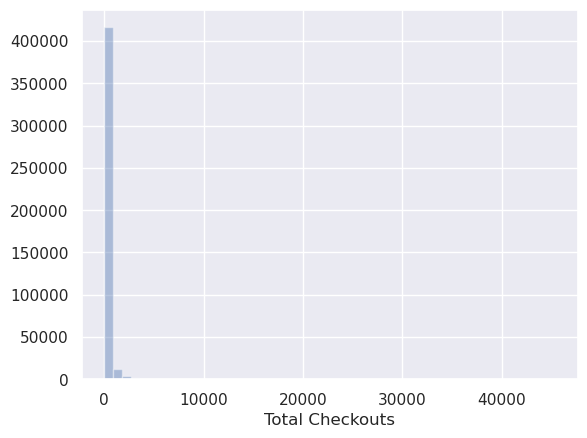

In [3]:
df = pd.read_csv("../data/Library_Usage.csv")
sns.distplot(df['Total Checkouts'], kde=False)

## 3.7 Exkurs Ausreißerentfernung III

- Erstelle eine neue Spalte 'Total Checkouts Sqrt', die die Wurzel über die Spalte Total Checkouts enthält. Die Wurzel für jede Beobachtung kannst Du mit df['Total Checkouts']**(0.5) berechnen.
- Schaue Dir das Histogramm von 'Total Checkouts Sqrt' an und charakterisiere die Verteilung.
- Vergleiche diese Methode mit den vorherigen zwei Verfahren zur Ausreißerbehandlung (Aufgaben 3.3 und 3.5). Welche Methode findest Du besser geeignet, um mit fehlenden Werten umzugehen?
- Fallen Dir Vor- und Nachteile der jeweiligen Methoden ein?

In [4]:
df['Total Checkouts Sqrt'] = df['Total Checkouts']**(0.5)

In [5]:
df

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County,Total Checkouts Sqrt
0,5,Staff,53,15,NaN,b2,Bayview,Mar,2023.0,z,Email,True,2003,False,7.280110
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False,21.908902
2,5,Staff,70,33,45 to 54 years,n4,Noe Valley,Jan,2023.0,z,Email,True,2011,False,8.366600
3,5,Staff,3934,2140,NaN,o2,Ocean View,Jul,2023.0,z,Email,True,2003,False,62.721607
4,5,Staff,1118,1035,NaN,o7,Ortega,Jul,2023.0,z,Email,True,2003,False,33.436507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436285,0,Adult,2,6,35 to 44 years,yjj,Bookmobile,Oct,2022.0,z,Email,True,2020,NaN,1.414214
436286,2,Teen,3,0,10 to 19 years,yjj,Bookmobile,Nov,2015.0,z,Email,True,2011,NaN,1.732051
436287,0,Adult,6,0,60 to 64 years,ylw,Bookmobile,Mar,2022.0,z,Email,True,2022,NaN,2.449490
436288,15,Teacher Card,4,0,35 to 44 years,ylw,Bookmobile,Sep,2020.0,z,Email,True,2019,NaN,2.000000


/tmp/ipykernel_5421/4272173287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Checkouts Sqrt'], kde=False)


<Axes: xlabel='Total Checkouts Sqrt'>

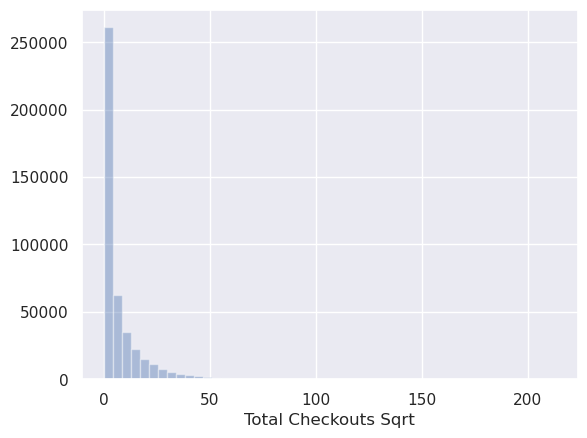

In [6]:
sns.distplot(df['Total Checkouts Sqrt'], kde=False)

In [9]:
df['Total Checkouts'].median()

7.0

In [10]:
df['Total Checkouts'].mean()

160.29484287973597

Hierbei handelt es sich um eine likssteile Verteilung. Der Mittelwert größer als der Median. Sie ist nicht symmertisch und es liegt eine Bimodale Verteilung vor.

Ich glaube es hängt weniger damit zusammen welche Methode ich besser finde, als was man genau als Ergebnis haben will. Je nachdem würde ich mich dann für eine Methode entscheiden